In [ ]:
import pandas as pd
text_path = '/content/'

files = [
    "LightSabers_DS_Processed.csv",
    "lightsaber_non_DS.txt",
    "PowerAdapters_DS_Processed.csv",
    "poweradapters_non_DS.txt",
    "StripLights_DS_Processed.csv",
    "striplights_non_DS.txt",
    "mixed_DS_Processed.csv",
    "mixed_non_DS.txt"
]

dataframes = {}
for file in files:
    file_path = text_path + file
    key = file.split('.')[0]  # Use base name of the file as the key
    if file.endswith('.csv'):
        dataframes[key] = pd.read_csv(file_path, header=None, names=['data'])
    elif file.endswith('.txt'):
        with open(file_path, 'r') as file:
            data = file.read().split('\n')
        dataframes[key] = pd.DataFrame(data, columns=['data'])

# Combine datasets in pairs and add 'dropshipped' column
combined_dataframes = {}
for i in range(0, len(files), 2):
    ds_key, non_ds_key = files[i].split('.')[0], files[i+1].split('.')[0]
    ds_df = dataframes[ds_key]
    non_ds_df = dataframes[non_ds_key]

    # Add 'dropshipped' column
    ds_df['dropshipped'] = 'Dropshipped'
    non_ds_df['dropshipped'] = 'Not Dropshipped'

    # Determine the product type for the 'source' column
    product_type = ds_key.split('_')[0]

    # Add 'source' column
    ds_df['source'] = product_type
    non_ds_df['source'] = product_type

    # Combine and store in new dictionary
    combined_df = pd.concat([ds_df, non_ds_df], ignore_index=True)
    combined_dataframes[product_type] = combined_df

# Combine all product dataframes into one large dataframe
test_data = [combined_dataframes['LightSabers'], combined_dataframes['PowerAdapters'], combined_dataframes['StripLights']]
all_data = pd.concat(test_data, ignore_index=True)

# Save the combined dataframe to a new file
combined_dataframes['LightSabers']
combined_dataframes['all'] = all_data
all_data.head()

,data,dropshipped,source
0,skip main content walmart depart servic search...,Dropshipped,LightSabers
1,christma saber giveaway four zero off all sabe...,Dropshipped,LightSabers
2,dure black novemb youv donat four zero zero ze...,Dropshipped,LightSabers
3,v skip main content ebay home shop categori en...,Dropshipped,LightSabers
4,skip content shop our holiday gift guid to fin...,Dropshipped,LightSabers


In [ ]:
!pip install sentencepiece
!pip install --upgrade jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.20+cuda11.cudnn86
    Uninstalling jaxlib-0.4.20+cuda11.cudnn86:
      Successfully uninstalled jaxlib-0.4.20+cuda11.cudnn86
  Attempting uninstall: jax
    Found existing installation: jax 0.4.20
    Uninstalling jax-0.4.20:
      Successfully uninstalled jax-0.4.20


In [ ]:
combined_dataframes.keys()

dict_keys(['LightSabers', 'PowerAdapters', 'StripLights', 'mixed', 'all'])

Tesla V100-SXM2-16GB
Training on fold 1/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 1, Average Training loss: 0.41944286465348507
Fold 1, Validation loss: 0.5622818429255858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 - Accuracy: 0.8579545454545454, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 2, Average Training loss: 0.4174753122285686
Fold 1, Validation loss: 0.23292864742688835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 - Accuracy: 0.8579545454545454, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 3, Average Training loss: 0.07437835634482326
Fold 1, Validation loss: 0.0031106549299279736
Fold 1 - Accuracy: 0.9985795454545454, Precision: 0.9900990099009901, Recall: 1.0, F1: 0.9950248756218906


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 4, Average Training loss: 0.01031377136115969
Fold 1, Validation loss: 0.000853647777231262
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.84it/s]


Fold 1, Epoch 5, Average Training loss: 0.007230825391822939
Fold 1, Validation loss: 0.0005157698476316662
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 6, Average Training loss: 0.006163323771695353
Fold 1, Validation loss: 0.00034118658732040785
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 7, Average Training loss: 0.006656014548670183
Fold 1, Validation loss: 0.00027538863221045836
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 8, Average Training loss: 0.006094327648911117
Fold 1, Validation loss: 0.00025228135035087524
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 1, Epoch 9, Average Training loss: 0.005935631554827772
Fold 1, Validation loss: 0.0002575807729127436
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.84it/s]


Fold 1, Epoch 10, Average Training loss: 0.0060863783401146065
Fold 1, Validation loss: 0.00034171484879731327
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Training on fold 2/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:44<00:00,  7.85it/s]


Fold 2, Epoch 1, Average Training loss: 0.4388502758546648
Fold 2, Validation loss: 0.40921835707161913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 - Accuracy: 0.8577524893314367, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:44<00:00,  7.84it/s]


Fold 2, Epoch 2, Average Training loss: 0.4198636088139293
Fold 2, Validation loss: 0.40546730092980643


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 - Accuracy: 0.8577524893314367, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:45<00:00,  7.80it/s]


Fold 2, Epoch 3, Average Training loss: 0.17526913143096448
Fold 2, Validation loss: 0.0010963521334898278
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:45<00:00,  7.81it/s]


Fold 2, Epoch 4, Average Training loss: 0.02033527502796708
Fold 2, Validation loss: 0.008252948306273373
Fold 2 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:45<00:00,  7.80it/s]


Fold 2, Epoch 5, Average Training loss: 0.007447163850553228
Fold 2, Validation loss: 0.00034554451138484927
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:45<00:00,  7.80it/s]


Fold 2, Epoch 6, Average Training loss: 0.006381300583267479
Fold 2, Validation loss: 0.0003266578807432035
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 2, Epoch 7, Average Training loss: 0.01762698331814053
Fold 2, Validation loss: 0.00044541853441676886
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 2, Epoch 8, Average Training loss: 0.006204026636954619
Fold 2, Validation loss: 0.003374899317846443
Fold 2 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 2, Epoch 9, Average Training loss: 0.006317618878959117
Fold 2, Validation loss: 0.0036859808334900827
Fold 2 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 2, Epoch 10, Average Training loss: 0.006465561186401333
Fold 2, Validation loss: 0.003940116581609552
Fold 2 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593
Training on fold 3/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 1, Average Training loss: 0.42853244353847747
Fold 3, Validation loss: 0.40394737833941524


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 - Accuracy: 0.8577524893314367, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 2, Average Training loss: 0.42004865962503984
Fold 3, Validation loss: 0.2974520367146893


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 - Accuracy: 0.8577524893314367, Precision: 0.0, Recall: 0.0, F1: 0.0


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 3, Average Training loss: 0.08047857227376715
Fold 3, Validation loss: 0.011253610650535185
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 4, Average Training loss: 0.0020112834149172572
Fold 3, Validation loss: 0.011764396823557698
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 5, Average Training loss: 0.0011325721041595732
Fold 3, Validation loss: 0.012258686836337967
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 6, Average Training loss: 0.07664942394066285
Fold 3, Validation loss: 0.01126771107076572
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 7, Average Training loss: 0.0019367076856724452
Fold 3, Validation loss: 0.016496830508251813
Fold 3 - Accuracy: 0.9971550497866287, Precision: 0.99, Recall: 0.99, F1: 0.99


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 8, Average Training loss: 0.0019639713021785033
Fold 3, Validation loss: 0.012536377848350226
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 9, Average Training loss: 0.010409934359482908
Fold 3, Validation loss: 0.011636680520909564
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


100%|██████████| 352/352 [00:44<00:00,  7.83it/s]


Fold 3, Epoch 10, Average Training loss: 0.0008672608004913359
Fold 3, Validation loss: 0.012738626982354617
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593
Overall results for Fold 1: Accuracy: 0.8579545454545454, Precision: 0.0, Recall: 0.0, F1: 0.0
Overall results for Fold 2: Accuracy: 0.8579545454545454, Precision: 0.0, Recall: 0.0, F1: 0.0
Overall results for Fold 3: Accuracy: 0.9985795454545454, Precision: 0.9900990099009901, Recall: 1.0, F1: 0.9950248756218906
Overall results for Fold 4: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 5: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 6: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 7: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 8: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 9: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Over

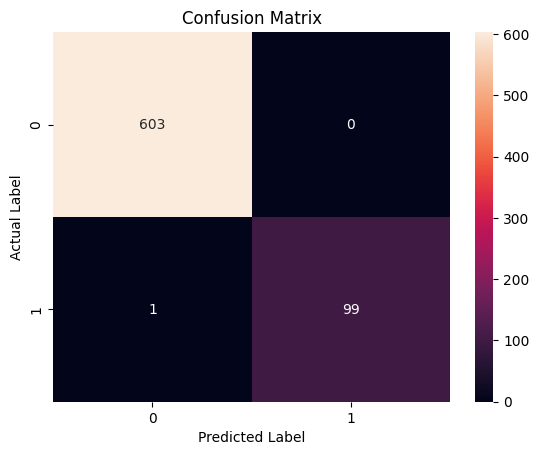

In [ ]:
# BERT
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

all_data['label'] = all_data['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
all_data.dropna(subset=['data'], inplace=True)
all_data['data'] = all_data['data'].astype(str)

# Balance the dataset to 60% non-dropshipped and 40% dropshipped
class_0 = all_data[all_data['label'] == 0]
class_1 = all_data[all_data['label'] == 1]
total_sample_size = len(all_data)
sample_size_class_0 = int(total_sample_size * 0.6)  # 60% non-dropshipped
sample_size_class_1 = int(total_sample_size * 0.4)  # 40% dropshipped
sample_size_class_0 = min(sample_size_class_0, len(class_0))
sample_size_class_1 = min(sample_size_class_1, len(class_1))
balanced_data = pd.concat([class_0.sample(sample_size_class_0, random_state=42),
                           class_1.sample(sample_size_class_1, random_state=42)])
balanced_data = balanced_data.sample(frac=1, random_state=29).reset_index(drop=True)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Stratified K-Fold Cross-Validation
num_epochs = 10
skf = StratifiedKFold(n_splits=3)
fold_results = []
for fold, (train_idx, test_idx) in enumerate(skf.split(balanced_data, balanced_data['label'])):
    print(f"Training on fold {fold+1}/{skf.n_splits}")

    train_data = balanced_data.iloc[train_idx]
    test_data = balanced_data.iloc[test_idx]
    train_encodings = tokenizer(train_data['data'].to_list(), truncation=True, padding=True)
    test_encodings = tokenizer(test_data['data'].to_list(), truncation=True, padding=True)
    train_dataset = TextDataset(train_encodings, train_data['label'].tolist())
    test_dataset = TextDataset(test_encodings, test_data['label'].tolist())

    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

    # Configure the model
    config = BertConfig.from_pretrained('bert-base-uncased', num_labels=2)
    config.hidden_dropout_prob = 0.4
    config.attention_probs_dropout_prob = 0.4
    model = BertForSequenceClassification(config)
    model.to(device)

    # Optimizer and scheduler
    optim = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader):
            optim.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optim.step()

        avg_train_loss = total_loss / len(train_loader)
        print(f"Fold {fold+1}, Epoch {epoch+1}, Average Training loss: {avg_train_loss}")

        # Validation
        model.eval()
        val_loss = 0
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            val_loss += torch.nn.functional.cross_entropy(logits, batch['labels'].to(device)).item()

        avg_val_loss = val_loss / len(test_loader)
        print(f"Fold {fold+1}, Validation loss: {avg_val_loss}")

        # Evaluation
        test_preds, test_targets = [], []
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            test_preds.extend(torch.argmax(logits, axis=1).tolist())
            test_targets.extend(batch['labels'].tolist())

        fold_accuracy = accuracy_score(test_targets, test_preds)
        fold_precision, fold_recall, fold_f1, _ = precision_recall_fscore_support(test_targets, test_preds, average='binary')
        fold_results.append((fold_accuracy, fold_precision, fold_recall, fold_f1))
        print(f"Fold {fold+1} - Accuracy: {fold_accuracy}, Precision: {fold_precision}, Recall: {fold_recall}, F1: {fold_f1}")

# Display overall results
for i, (accuracy, precision, recall, f1) in enumerate(fold_results):
    print(f"Overall results for Fold {i+1}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

# After making predictions:
test_preds, test_targets = [], []
for batch in test_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    test_preds.extend(torch.argmax(logits, axis=1).tolist())
    test_targets.extend(batch['labels'].tolist())

test_preds_np = np.array(test_preds)
test_targets_np = np.array(test_targets)

predicted_class_distribution = np.bincount(test_preds_np)
actual_class_distribution = np.bincount(test_targets_np)

#Outputs testing
print("Predicted Class Distribution:", predicted_class_distribution)
print("Actual Class Distribution:", actual_class_distribution)

# Confusion Matrix
cm = confusion_matrix(test_targets_np, test_preds_np)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Tesla V100-SXM2-16GB


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Training on fold 1/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 1, Epoch 1, Average Training loss: 0.33760472424032667
Fold 1, Validation loss: 0.32718265239918043
Fold 1, Epoch 2, Average Training loss: 0.3392960163542912
Fold 1, Validation loss: 0.34146933777937816
Fold 1, Epoch 3, Average Training loss: 0.3344133260053775
Fold 1, Validation loss: 0.3323863388763534
Fold 1, Epoch 4, Average Training loss: 0.3626359867612048
Fold 1, Validation loss: 0.3234790299265158
Fold 1, Epoch 5, Average Training loss: 0.33433412436750676
Fold 1, Validation loss: 0.3233363704667205
Fold 1, Epoch 6, Average Training loss: 0.3337629255912607
Fold 1, Validation loss: 0.32857189753225874
Fold 1, Epoch 7, Average Training loss: 0.3336844958276266
Fold 1, Validation loss: 0.3257250172633027
Fold 1, Epoch 8, Average Training loss: 0.331691740553767
Fold 1, Validation loss: 0.32517777678985443
Fold 1, Epoch 9, Average Training loss: 0.3303688502323533
Fold 1, Validation loss: 0.3258911644419034
Fold 1, Epoch 10, Average Training loss: 0.3315680472268945
Fold 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 - Accuracy: 0.9005964214711729, Precision: 0.0, Recall: 0.0, F1: 0.0, AUC: 0.9920695364238411
Training on fold 2/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 2, Epoch 1, Average Training loss: 0.34806127076791155
Fold 2, Validation loss: 0.3238727856604826
Fold 2, Epoch 2, Average Training loss: 0.33668570239688195
Fold 2, Validation loss: 0.3253810206457736
Fold 2, Epoch 3, Average Training loss: 0.34396944455211126
Fold 2, Validation loss: 0.3618965261275806
Fold 2, Epoch 4, Average Training loss: 0.34173913540998624
Fold 2, Validation loss: 0.3289192004927567
Fold 2, Epoch 5, Average Training loss: 0.3302183639672067
Fold 2, Validation loss: 0.33071635261414545
Fold 2, Epoch 6, Average Training loss: 0.33343979796128614
Fold 2, Validation loss: 0.3240047694435195
Fold 2, Epoch 7, Average Training loss: 0.3309846945284378
Fold 2, Validation loss: 0.3297185328981233
Fold 2, Epoch 8, Average Training loss: 0.3342150922805544
Fold 2, Validation loss: 0.3267507081821797
Fold 2, Epoch 9, Average Training loss: 0.32651349896239856
Fold 2, Validation loss: 0.32697030446595615
Fold 2, Epoch 10, Average Training loss: 0.3280203581920692
Fold 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 - Accuracy: 0.9005964214711729, Precision: 0.0, Recall: 0.0, F1: 0.0, AUC: 0.019812362030905077
Training on fold 3/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 3, Epoch 1, Average Training loss: 0.34147606901676647
Fold 3, Validation loss: 0.3455307301547792
Fold 3, Epoch 2, Average Training loss: 0.33968086251693347
Fold 3, Validation loss: 0.32409661919588134
Fold 3, Epoch 3, Average Training loss: 0.33237413464794086
Fold 3, Validation loss: 0.3275510240641851
Fold 3, Epoch 4, Average Training loss: 0.33386006785763633
Fold 3, Validation loss: 0.3417337824782682
Fold 3, Epoch 5, Average Training loss: 0.34789524091378093
Fold 3, Validation loss: 0.3231223857710286
Fold 3, Epoch 6, Average Training loss: 0.33681766347338754
Fold 3, Validation loss: 0.331426019174239
Fold 3, Epoch 7, Average Training loss: 0.1345087085080902
Fold 3, Validation loss: 0.00948149979295623
Fold 3, Epoch 8, Average Training loss: 0.016888662409554753
Fold 3, Validation loss: 0.006077898408023877
Fold 3, Epoch 9, Average Training loss: 0.009469055487970186
Fold 3, Validation loss: 0.02805800279343708
Fold 3, Epoch 10, Average Training loss: 0.0112333822296008

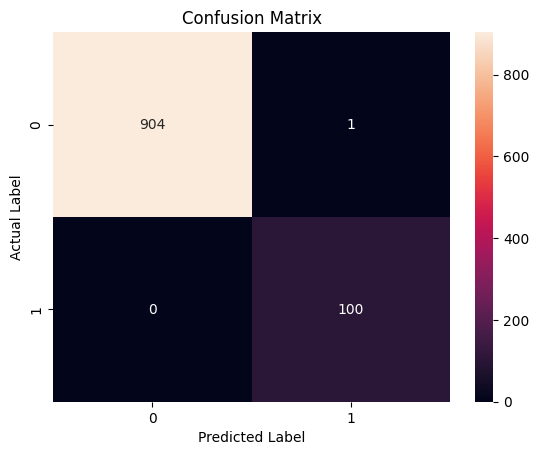

In [ ]:
#RoBERTa
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaConfig, AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import get_linear_schedule_with_warmup

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

all_data['label'] = all_data['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
all_data.dropna(subset=['data'], inplace=True)
all_data['data'] = all_data['data'].astype(str)

# Balance the dataset to 60% non-dropshipped and 40% dropshipped
class_0 = all_data[all_data['label'] == 0]
class_1 = all_data[all_data['label'] == 1]

# Calculate sample sizes based on desired proportions
total_sample_size = len(all_data)
sample_size_class_0 = int(total_sample_size * 0.6)  # 60% non-dropshipped
sample_size_class_1 = int(total_sample_size * 0.4)  # 40% dropshipped

# Ensure sample sizes do not exceed the available data in each class
sample_size_class_0 = min(sample_size_class_0, len(class_0))
sample_size_class_1 = min(sample_size_class_1, len(class_1))

# Sample the data
balanced_data = pd.concat([class_0.sample(sample_size_class_0, random_state=42),
                           class_1.sample(sample_size_class_1, random_state=42)])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

all_data = balanced_data

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Dataset class
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Stratified K-Fold Cross-Validation
num_epochs = 10
skf = StratifiedKFold(n_splits=3)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(skf.split(all_data, all_data['label'])):
    print(f"Training on fold {fold+1}/{skf.n_splits}")

    train_data = all_data.iloc[train_idx]
    test_data = all_data.iloc[test_idx]

    train_encodings = tokenizer(train_data['data'].to_list(), truncation=True, padding=True)
    test_encodings = tokenizer(test_data['data'].to_list(), truncation=True, padding=True)

    train_dataset = TextDataset(train_encodings, train_data['label'].tolist())
    test_dataset = TextDataset(test_encodings, test_data['label'].tolist())

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    config = RobertaConfig.from_pretrained('roberta-base', num_labels=2)
    config.hidden_dropout_prob = 0.2
    config.attention_probs_dropout_prob = 0.2
    model = RobertaForSequenceClassification(config)
    model.to(device)

    optim = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
    total_steps = len(train_loader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(optim, num_warmup_steps=0, num_training_steps=total_steps)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optim.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optim.step()
            scheduler.step()

        avg_train_loss = total_loss / len(train_loader)
        print(f"Fold {fold+1}, Epoch {epoch+1}, Average Training loss: {avg_train_loss}")

        model.eval()
        val_loss = 0
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            val_loss += torch.nn.functional.cross_entropy(logits, batch['labels'].to(device)).item()

        avg_val_loss = val_loss / len(test_loader)
        print(f"Fold {fold+1}, Validation loss: {avg_val_loss}")

    model.eval()
    test_preds, test_targets, test_probs = [], [], []
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        test_preds.extend(torch.argmax(logits, axis=1).tolist())
        test_targets.extend(batch['labels'].tolist())
        test_probs.extend(torch.softmax(logits, dim=1)[:, 1].tolist())

    fold_accuracy = accuracy_score(test_targets, test_preds)
    fold_precision, fold_recall, fold_f1, _ = precision_recall_fscore_support(test_targets, test_preds, average='binary')
    fold_auc = roc_auc_score(test_targets, test_probs)
    fold_results.append((fold_accuracy, fold_precision, fold_recall, fold_f1, fold_auc))
    print(f"Fold {fold+1} - Accuracy: {fold_accuracy}, Precision: {fold_precision}, Recall: {fold_recall}, F1: {fold_f1}, AUC: {fold_auc}")

# Final Metrics Calculation
final_accuracy = np.mean([acc for acc, _, _, _, _ in fold_results])
final_precision = np.mean([prec for _, prec, _, _, _ in fold_results])
final_recall = np.mean([rec for _, _, rec, _, _ in fold_results])
final_f1 = np.mean([f1 for _, _, _, f1, _ in fold_results])
final_auc = np.mean([auc for _, _, _, _, auc in fold_results])

print(f"Final Metrics - Accuracy: {final_accuracy}, Precision: {final_precision}, Recall: {final_recall}, F1: {final_f1}, AUC: {final_auc}")

# Confusion Matrix
cm = confusion_matrix(test_targets, test_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
#ALBERT

import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import sentencepiece
from transformers import AlbertTokenizer, AlbertForSequenceClassification, AlbertConfig, AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

# Load and preprocess your data
all_data['label'] = all_data['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
all_data.dropna(subset=['data'], inplace=True)
all_data['data'] = all_data['data'].astype(str)

all_data['label'] = all_data['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
all_data.dropna(subset=['data'], inplace=True)
all_data['data'] = all_data['data'].astype(str)

# Balance the dataset to 60% non-dropshipped and 40% dropshipped
class_0 = all_data[all_data['label'] == 0]
class_1 = all_data[all_data['label'] == 1]

# Calculate sample sizes based on desired proportions
total_sample_size = len(all_data)
sample_size_class_0 = int(total_sample_size * 0.6)  # 60% non-dropshipped
sample_size_class_1 = int(total_sample_size * 0.4)  # 40% dropshipped

# Ensure sample sizes do not exceed the available data in each class
sample_size_class_0 = min(sample_size_class_0, len(class_0))
sample_size_class_1 = min(sample_size_class_1, len(class_1))

# Sample it
balanced_data = pd.concat([class_0.sample(sample_size_class_0, random_state=42),
                           class_1.sample(sample_size_class_1, random_state=42)])
balanced_data = balanced_data.sample(frac=1, random_state=29).reset_index(drop=True)
all_data = balanced_data

all_data['label'] = all_data['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
print(all_data['label'].value_counts())

all_data.dropna(subset=['data'], inplace=True)
all_data['data'] = all_data['data'].astype(str)

# Using Albert Base Version
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


skf = StratifiedKFold(n_splits=3)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(skf.split(all_data, all_data['label'])):
    print(f"Training on fold {fold+1}/{skf.n_splits}")

    train_data = all_data.iloc[train_idx]
    test_data = all_data.iloc[test_idx]

    train_encodings = tokenizer(train_data['data'].to_list(), truncation=True, padding=True)
    test_encodings = tokenizer(test_data['data'].to_list(), truncation=True, padding=True)

    train_dataset = TextDataset(train_encodings, train_data['label'].tolist())
    test_dataset = TextDataset(test_encodings, test_data['label'].tolist())

    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

    config = AlbertConfig.from_pretrained('albert-base-v2', num_labels=2)
    config.classifier_dropout_prob = 0.4
    model = AlbertForSequenceClassification(config)
    model.to(device)

    optim = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)

    early_stopping_patience = 2
    best_val_loss = float('inf')

    for epoch in range(10):  # Number of epochs
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader):
            optim.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optim.step()

        avg_train_loss = total_loss / len(train_loader)
        print(f"Fold {fold+1}, Epoch {epoch+1}, Average Training loss: {avg_train_loss}")

        model.eval()
        val_loss = 0
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            val_loss += torch.nn.functional.cross_entropy(logits, batch['labels'].to(device)).item()

        avg_val_loss = val_loss / len(test_loader)
        print(f"Fold {fold+1}, Validation loss: {avg_val_loss}")

        best_val_loss = avg_val_loss
        early_stopping_counter = 0

    model.eval()
    test_preds, test_targets = [], []
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        test_preds.extend(torch.argmax(logits, axis=1).tolist())
        test_targets.extend(batch['labels'].tolist())

    fold_accuracy = accuracy_score(test_targets, test_preds)
    fold_precision, fold_recall, fold_f1, _ = precision_recall_fscore_support(test_targets, test_preds, average='binary')
    fold_results.append((fold_accuracy, fold_precision, fold_recall, fold_f1))
    print(f"Fold {fold+1} - Accuracy: {fold_accuracy}, Precision: {fold_precision}, Recall: {fold_recall}, F1: {fold_f1}")

for i, (accuracy, precision, recall, f1) in enumerate(fold_results):
    print(f"Overall results for Fold {i+1}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

# Final Metrics Calculation
final_accuracy = np.mean([acc for acc, _, _, _ in fold_results])
final_precision = np.mean([prec for _, prec, _, _ in fold_results])
final_recall = np.mean([rec for _, _, rec, _ in fold_results])
final_f1 = np.mean([f1 for _, _, _, f1 in fold_results])
# final_auc = np.mean([auc for _, _, _, _, auc in fold_results])

print(f"Final Metrics - Accuracy: {final_accuracy}, Precision: {final_precision}, Recall: {final_recall}, F1: {final_f1}")

# Confusion Matrix
cm = confusion_matrix(test_targets, test_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Tesla V100-SXM2-16GB
0    939
1    300
Name: label, dtype: int64
Training on fold 1/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 1, Epoch 1, Average Training loss: 0.572569969303654
Fold 1, Validation loss: 0.586442116361398


100%|██████████| 207/207 [00:26<00:00,  7.81it/s]


Fold 1, Epoch 2, Average Training loss: 0.41642576609040804
Fold 1, Validation loss: 0.15453118005265984


100%|██████████| 207/207 [00:26<00:00,  7.80it/s]


Fold 1, Epoch 3, Average Training loss: 0.2798545147193335
Fold 1, Validation loss: 0.06242748830789843


100%|██████████| 207/207 [00:26<00:00,  7.80it/s]


Fold 1, Epoch 4, Average Training loss: 0.02709660879988673
Fold 1, Validation loss: 0.005447739298688248


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 1, Epoch 5, Average Training loss: 0.010358582017943263
Fold 1, Validation loss: 0.0027799545026097735


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 1, Epoch 6, Average Training loss: 0.009510132075278403
Fold 1, Validation loss: 0.0021791435193825657


100%|██████████| 207/207 [00:26<00:00,  7.80it/s]


Fold 1, Epoch 7, Average Training loss: 0.009913596169964595
Fold 1, Validation loss: 0.0016982985085073428


100%|██████████| 207/207 [00:26<00:00,  7.80it/s]


Fold 1, Epoch 8, Average Training loss: 0.009661565508900417
Fold 1, Validation loss: 0.0014199683265850092


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 1, Epoch 9, Average Training loss: 0.009198492172158408
Fold 1, Validation loss: 0.0012547783687925683


100%|██████████| 207/207 [00:26<00:00,  7.80it/s]


Fold 1, Epoch 10, Average Training loss: 0.009984406562474813
Fold 1, Validation loss: 0.0013150152371963486
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Training on fold 2/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 1, Average Training loss: 0.5754451143424868
Fold 2, Validation loss: 0.5701550935896543


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 2, Average Training loss: 0.4550980703392323
Fold 2, Validation loss: 0.17189265545815802


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 3, Average Training loss: 0.03834515048757843
Fold 2, Validation loss: 0.018343368095184606


100%|██████████| 207/207 [00:26<00:00,  7.78it/s]


Fold 2, Epoch 4, Average Training loss: 0.0026836270277482877
Fold 2, Validation loss: 0.017872621270586163


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 5, Average Training loss: 0.0014931558921555247
Fold 2, Validation loss: 0.018253766590183098


100%|██████████| 207/207 [00:26<00:00,  7.75it/s]


Fold 2, Epoch 6, Average Training loss: 0.0009852242793838362
Fold 2, Validation loss: 0.018689553082647484


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 7, Average Training loss: 0.0007409597876378231
Fold 2, Validation loss: 0.019119503998249108


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 8, Average Training loss: 0.000579030688425778
Fold 2, Validation loss: 0.019531209547914423


100%|██████████| 207/207 [00:26<00:00,  7.77it/s]


Fold 2, Epoch 9, Average Training loss: 0.00045855252416961904
Fold 2, Validation loss: 0.019917538390403094


100%|██████████| 207/207 [00:26<00:00,  7.78it/s]


Fold 2, Epoch 10, Average Training loss: 0.00037638648654388237
Fold 2, Validation loss: 0.020283489324356196
Fold 2 - Accuracy: 0.9975786924939467, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593
Training on fold 3/3


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 1, Average Training loss: 0.5739274039360636
Fold 3, Validation loss: 0.5385244865543567


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 2, Average Training loss: 0.3236737109198806
Fold 3, Validation loss: 0.09505688671309215


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 3, Average Training loss: 0.07698451066254705
Fold 3, Validation loss: 0.009985300410055341


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 4, Average Training loss: 0.01267393456225324
Fold 3, Validation loss: 0.0032524094948222716


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 5, Average Training loss: 0.010049343393701646
Fold 3, Validation loss: 0.0023082372633955227


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 6, Average Training loss: 0.010276395546335386
Fold 3, Validation loss: 0.0018570692817985008


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 7, Average Training loss: 0.009383953768919685
Fold 3, Validation loss: 0.0017720794958922153


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 8, Average Training loss: 0.010399797010114011
Fold 3, Validation loss: 0.0015629240034076457


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 9, Average Training loss: 0.010111944351214826
Fold 3, Validation loss: 0.0015576510016287032


100%|██████████| 207/207 [00:26<00:00,  7.79it/s]


Fold 3, Epoch 10, Average Training loss: 0.010263661379871917
Fold 3, Validation loss: 0.0016457778894199203
Fold 3 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 1: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Overall results for Fold 2: Accuracy: 0.9975786924939467, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593
Overall results for Fold 3: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


ValueError: ignored

Final Metrics - Accuracy: 0.9991928974979821, Precision: 1.0, Recall: 0.9966666666666667, F1: 0.9983249581239532


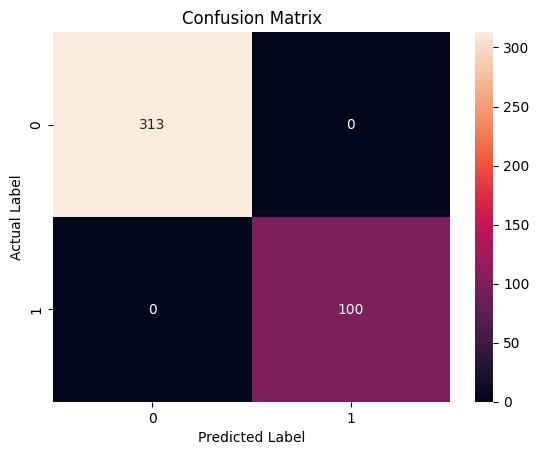

NameError: ignored

In [ ]:
# Final Metrics Calculation
final_accuracy = np.mean([acc for acc, _, _, _ in fold_results])
final_precision = np.mean([prec for _, prec, _, _ in fold_results])
final_recall = np.mean([rec for _, _, rec, _ in fold_results])
final_f1 = np.mean([f1 for _, _, _, f1 in fold_results])
# final_auc = np.mean([auc for _, _, _, _, auc in fold_results])

print(f"Final Metrics - Accuracy: {final_accuracy}, Precision: {final_precision}, Recall: {final_recall}, F1: {final_f1}")

# Confusion Matrix
cm = confusion_matrix(test_targets, test_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


data = combined_dataframes['mixed']

# Display the first few rows of the modified DataFrame
print(data.head())

# Preprocess the data
texts = data['data'].tolist()  # Accessing the text data from the 'data' column
encodings = tokenizer(texts, truncation=True, padding=True, return_tensors="pt")

batch_size = 8  # Adjust this based on your GPU capacity
num_batches = len(data) // batch_size + (0 if len(data) % batch_size == 0 else 1)
predictions = []

for i in range(num_batches):
    batch_texts = data['data'][i * batch_size:(i + 1) * batch_size].tolist()
    encodings = tokenizer(batch_texts, truncation=True, padding=True, return_tensors="pt")

    # Move encodings to the device
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    # Run predictions
    model.eval()
    with torch.no_grad():
        batch_outputs = model(input_ids, attention_mask=attention_mask)
    batch_predictions = torch.argmax(batch_outputs.logits, dim=1)
    predictions.extend(batch_predictions.cpu().numpy())

predictions = torch.tensor(predictions)
true_labels = torch.ones(len(data), dtype=torch.long)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels.numpy(), predictions.numpy())
precision, recall, f1, _ = precision_recall_fscore_support(true_labels.numpy(), predictions.numpy(), average='binary')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

                                                data  dropshipped source
0  your cart no product cart skip content home ho...  Dropshipped  mixed
1  your cart no product cart skip content home ho...  Dropshipped  mixed
2  your cart no product cart skip content home ho...  Dropshipped  mixed
3  your cart no product cart skip content home ho...  Dropshipped  mixed
4  your cart no product cart skip content home ho...  Dropshipped  mixed
Accuracy: 0.5867418899858956, Precision: 1.0, Recall: 0.5867418899858956, F1: 0.7395555555555555


In [ ]:
#ALBERT on all individual datasets
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
import sentencepiece
from transformers import AlbertTokenizer, AlbertForSequenceClassification, AlbertConfig, AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Dictionary to store accuracy metrics for each dataset
accuracy_metrics = {}

for dataset_name, dataset in combined_dataframes.items():
    print(f"Training and evaluating on dataset: {dataset_name}")

    dataset['label'] = dataset['dropshipped'].map({'Dropshipped': 1, 'Not Dropshipped': 0})
    dataset.dropna(subset=['data'], inplace=True)
    dataset['data'] = dataset['data'].astype(str)

    all_data = dataset

    # Balance the dataset to 60% non-dropshipped and 40% dropshipped
    class_0 = all_data[all_data['label'] == 0]
    class_1 = all_data[all_data['label'] == 1]

    total_sample_size = len(all_data)
    sample_size_class_0 = min(int(total_sample_size * 0.6), len(class_0))  # 60% non-dropshipped
    sample_size_class_1 = min(int(total_sample_size * 0.4), len(class_1))  # 40% dropshipped

    balanced_data = pd.concat([class_0.sample(sample_size_class_0, random_state=42),
                               class_1.sample(sample_size_class_1, random_state=42)])
    balanced_data = balanced_data.sample(frac=1, random_state=29).reset_index(drop=True)
    dataset = balanced_data

    skf = StratifiedKFold(n_splits=3)
    fold_results = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(dataset, dataset['label'])):
        train_data = dataset.iloc[train_idx]
        test_data = dataset.iloc[test_idx]

        train_encodings = tokenizer(train_data['data'].to_list(), truncation=True, padding=True)
        test_encodings = tokenizer(test_data['data'].to_list(), truncation=True, padding=True)

        train_dataset = TextDataset(train_encodings, train_data['label'].tolist())
        test_dataset = TextDataset(test_encodings, test_data['label'].tolist())

        train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

        config = AlbertConfig.from_pretrained('albert-base-v2', num_labels=2)
        config.classifier_dropout_prob = 0.4
        model = AlbertForSequenceClassification(config)
        model.to(device)

        optim = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)

        for epoch in range(10):
            model.train()
            total_loss = 0
            for batch in tqdm(train_loader):
                optim.zero_grad()
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                loss.backward()
                optim.step()

            avg_train_loss = total_loss / len(train_loader)
            print(f"Fold {fold+1}, Epoch {epoch+1}, Average Training loss: {avg_train_loss}")

            model.eval()
            val_loss = 0
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                with torch.no_grad():
                    outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                val_loss += torch.nn.functional.cross_entropy(logits, batch['labels'].to(device)).item()

            avg_val_loss = val_loss / len(test_loader)
            print(f"Fold {fold+1}, Validation loss: {avg_val_loss}")

        model.eval()
        test_preds, test_targets = [], []
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            test_preds.extend(torch.argmax(logits, axis=1).tolist())
            test_targets.extend(batch['labels'].tolist())

        fold_accuracy = accuracy_score(test_targets, test_preds)
        fold_precision, fold_recall, fold_f1, _ = precision_recall_fscore_support(test_targets, test_preds, average='binary', zero_division=0)
        fold_results.append((fold_accuracy, fold_precision, fold_recall, fold_f1))
        print(f"Fold {fold+1} - Accuracy: {fold_accuracy}, Precision: {fold_precision}, Recall: {fold_recall}, F1: {fold_f1}")

    fold_accuracy = np.mean([fr[0] for fr in fold_results])
    fold_precision = np.mean([fr[1] for fr in fold_results])
    fold_recall = np.mean([fr[2] for fr in fold_results])
    fold_f1 = np.mean([fr[3] for fr in fold_results])
    accuracy_metrics[dataset_name] = [fold_accuracy, fold_precision, fold_recall, fold_f1]
    print(f"Accuracy: {fold_accuracy}, Precision: {fold_precision}, Recall: {fold_recall}, F1: {fold_f1}")

# Display final accuracy metrics for all datasets
print("Final Accuracy Metrics Across All Datasets:")
for dataset_name, acc in accuracy_metrics.items():
    print(f"{dataset_name}: {acc}")

Tesla V100-SXM2-16GB
Training and evaluating on dataset: LightSabers


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 107/107 [00:13<00:00,  7.77it/s]


Fold 1, Epoch 1, Average Training loss: 0.4476028368851849
Fold 1, Validation loss: 0.43863814020598374


100%|██████████| 107/107 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 2, Average Training loss: 0.45133988433909195
Fold 1, Validation loss: 0.33055266793127414


100%|██████████| 107/107 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 3, Average Training loss: 0.16929058521707482
Fold 1, Validation loss: 0.1264893131037415


100%|██████████| 107/107 [00:13<00:00,  7.79it/s]


Fold 1, Epoch 4, Average Training loss: 0.0590723862297067
Fold 1, Validation loss: 0.06260808149387163


100%|██████████| 107/107 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 5, Average Training loss: 0.11387072378447471
Fold 1, Validation loss: 0.0698504849785456


100%|██████████| 107/107 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 6, Average Training loss: 0.016484468972971924
Fold 1, Validation loss: 0.04166583844495041


100%|██████████| 107/107 [00:13<00:00,  7.79it/s]


Fold 1, Epoch 7, Average Training loss: 0.003539965605519921
Fold 1, Validation loss: 0.041458905202388346


100%|██████████| 107/107 [00:13<00:00,  7.79it/s]


Fold 1, Epoch 8, Average Training loss: 0.0024078723400065274
Fold 1, Validation loss: 0.0421421683471029


100%|██████████| 107/107 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 9, Average Training loss: 0.0016576285396754811
Fold 1, Validation loss: 0.042996397890857664


100%|██████████| 107/107 [00:13<00:00,  7.79it/s]


Fold 1, Epoch 10, Average Training loss: 0.0012558731712862222
Fold 1, Validation loss: 0.04297761554200271
Fold 1 - Accuracy: 0.9906976744186047, Precision: 0.9705882352941176, Recall: 0.9705882352941176, F1: 0.9705882352941176


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 1, Average Training loss: 0.45817169419455306
Fold 2, Validation loss: 0.438427432819649


100%|██████████| 108/108 [00:13<00:00,  7.83it/s]


Fold 2, Epoch 2, Average Training loss: 0.4467001492847447
Fold 2, Validation loss: 0.42975577822437994


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 3, Average Training loss: 0.2841367293580401
Fold 2, Validation loss: 0.07961063619910015


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 4, Average Training loss: 0.08760100381483359
Fold 2, Validation loss: 0.04318179839497639


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 5, Average Training loss: 0.05983142062150701
Fold 2, Validation loss: 0.027248642605694907


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 6, Average Training loss: 0.026294127604665443
Fold 2, Validation loss: 0.009427675360779243


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 7, Average Training loss: 0.0627591226668166
Fold 2, Validation loss: 0.013561152508137402


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 8, Average Training loss: 0.032828178560723446
Fold 2, Validation loss: 0.011787504285435986


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 9, Average Training loss: 0.017016835468691878
Fold 2, Validation loss: 0.008028722256077108


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 2, Epoch 10, Average Training loss: 0.01582316411508213
Fold 2, Validation loss: 0.0065082291365359665
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 108/108 [00:13<00:00,  7.80it/s]


Fold 3, Epoch 1, Average Training loss: 0.4628349202512591
Fold 3, Validation loss: 0.4347681673588576


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 2, Average Training loss: 0.35824706805525003
Fold 3, Validation loss: 0.7693843714616917


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 3, Average Training loss: 0.4571126376934074
Fold 3, Validation loss: 0.4168428458549358


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 4, Average Training loss: 0.2759138704191341
Fold 3, Validation loss: 0.24355104220686136


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 5, Average Training loss: 0.08183608156266725
Fold 3, Validation loss: 0.026249070220661384


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 6, Average Training loss: 0.16972870619415684
Fold 3, Validation loss: 0.08182622237062012


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 7, Average Training loss: 0.07805555013732778
Fold 3, Validation loss: 0.019756110178099737


100%|██████████| 108/108 [00:13<00:00,  7.82it/s]


Fold 3, Epoch 8, Average Training loss: 0.021215943313479698
Fold 3, Validation loss: 0.00532990442675159


100%|██████████| 108/108 [00:13<00:00,  7.83it/s]


Fold 3, Epoch 9, Average Training loss: 0.017373788521918294
Fold 3, Validation loss: 0.0035389577323156926


100%|██████████| 108/108 [00:13<00:00,  7.84it/s]


Fold 3, Epoch 10, Average Training loss: 0.017650747065932525
Fold 3, Validation loss: 0.0030896573853506533
Fold 3 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Accuracy: 0.9968992248062015, Precision: 0.9901960784313726, Recall: 0.9901960784313726, F1: 0.9901960784313726
Training and evaluating on dataset: PowerAdapters


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 1, Epoch 1, Average Training loss: 0.395440944339293
Fold 1, Validation loss: 0.36052462395647883


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 1, Epoch 2, Average Training loss: 0.3655426063063279
Fold 1, Validation loss: 0.35820070076996174


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 1, Epoch 3, Average Training loss: 0.36689770337141736
Fold 1, Validation loss: 0.3601936921477318


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 1, Epoch 4, Average Training loss: 0.3156132002321767
Fold 1, Validation loss: 0.05435273164069988


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 1, Epoch 5, Average Training loss: 0.18476214289376644
Fold 1, Validation loss: 0.024351470841383432


100%|██████████| 142/142 [00:18<00:00,  7.77it/s]


Fold 1, Epoch 6, Average Training loss: 0.027202460467225124
Fold 1, Validation loss: 0.05384745191074383


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 1, Epoch 7, Average Training loss: 0.03403792999238825
Fold 1, Validation loss: 0.0063021610044992305


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 1, Epoch 8, Average Training loss: 0.016378906302147507
Fold 1, Validation loss: 0.00293768124169552


100%|██████████| 142/142 [00:18<00:00,  7.77it/s]


Fold 1, Epoch 9, Average Training loss: 0.0026069270810899392
Fold 1, Validation loss: 0.001900034630343213


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 1, Epoch 10, Average Training loss: 0.0017320092637944495
Fold 1, Validation loss: 0.0013481857776510672
Fold 1 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 142/142 [00:18<00:00,  7.77it/s]


Fold 2, Epoch 1, Average Training loss: 0.3852366138197167
Fold 2, Validation loss: 0.35716550954630677


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 2, Epoch 2, Average Training loss: 0.37360660836730203
Fold 2, Validation loss: 0.3645209074020386


100%|██████████| 142/142 [00:18<00:00,  7.79it/s]


Fold 2, Epoch 3, Average Training loss: 0.3669125822071039
Fold 2, Validation loss: 0.34474879608187875


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 2, Epoch 4, Average Training loss: 0.3151627171286185
Fold 2, Validation loss: 0.08166084653684791


100%|██████████| 142/142 [00:18<00:00,  7.78it/s]


Fold 2, Epoch 5, Average Training loss: 0.09945848610573514
Fold 2, Validation loss: 0.3650041858101605


100%|██████████| 142/142 [00:18<00:00,  7.79it/s]


Fold 2, Epoch 6, Average Training loss: 0.04114211751902345
Fold 2, Validation loss: 0.10363102948266856


100%|██████████| 142/142 [00:18<00:00,  7.79it/s]


Fold 2, Epoch 7, Average Training loss: 0.00487744090357192
Fold 2, Validation loss: 0.027165512231335988


100%|██████████| 142/142 [00:18<00:00,  7.79it/s]


Fold 2, Epoch 8, Average Training loss: 0.0023005661820258263
Fold 2, Validation loss: 0.02734085337855709


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 2, Epoch 9, Average Training loss: 0.0015488321754366526
Fold 2, Validation loss: 0.031201376651846607


100%|██████████| 142/142 [00:18<00:00,  7.79it/s]


Fold 2, Epoch 10, Average Training loss: 0.0011316654260080097
Fold 2, Validation loss: 0.026152337839807267
Fold 2 - Accuracy: 0.9929328621908127, Precision: 1.0, Recall: 0.9393939393939394, F1: 0.96875


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 142/142 [00:18<00:00,  7.77it/s]


Fold 3, Epoch 1, Average Training loss: 0.368483391026376
Fold 3, Validation loss: 0.35607063665356437


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 3, Epoch 2, Average Training loss: 0.37943446835581685
Fold 3, Validation loss: 0.35466987471765193


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 3, Epoch 3, Average Training loss: 0.3536139697780911
Fold 3, Validation loss: 0.3283053374206516


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 3, Epoch 4, Average Training loss: 0.1527555255140637
Fold 3, Validation loss: 0.011814364861749428


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 3, Epoch 5, Average Training loss: 0.006555169033752361
Fold 3, Validation loss: 0.0036961092666106324


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 3, Epoch 6, Average Training loss: 0.00277034596057976
Fold 3, Validation loss: 0.0018406741002994313


100%|██████████| 142/142 [00:18<00:00,  7.81it/s]


Fold 3, Epoch 7, Average Training loss: 0.0016671502228964015
Fold 3, Validation loss: 0.001339707957272431


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 3, Epoch 8, Average Training loss: 0.00114679790608598
Fold 3, Validation loss: 0.0009863444523636618


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 3, Epoch 9, Average Training loss: 0.0008660376920040146
Fold 3, Validation loss: 0.0007805882733393932


100%|██████████| 142/142 [00:18<00:00,  7.80it/s]


Fold 3, Epoch 10, Average Training loss: 0.0007203394253197139
Fold 3, Validation loss: 0.0006380957161063249
Fold 3 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Accuracy: 0.9976442873969376, Precision: 1.0, Recall: 0.9797979797979798, F1: 0.9895833333333334
Training and evaluating on dataset: StripLights


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 103/103 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 1, Average Training loss: 0.48822719281882915
Fold 1, Validation loss: 0.4341996025580626


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 2, Average Training loss: 0.4546839074023719
Fold 1, Validation loss: 0.4401273293277392


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 3, Average Training loss: 0.4343915841388471
Fold 1, Validation loss: 0.3912941317718763


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 4, Average Training loss: 0.27910791722677863
Fold 1, Validation loss: 0.44952323173101133


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 5, Average Training loss: 0.43783447117481417
Fold 1, Validation loss: 0.481607550325302


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 6, Average Training loss: 0.4228183681018723
Fold 1, Validation loss: 0.5025616691519434


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 7, Average Training loss: 0.4550001108024305
Fold 1, Validation loss: 0.43851204875570077


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 1, Epoch 8, Average Training loss: 0.4276677846040541
Fold 1, Validation loss: 0.35241894094416726


100%|██████████| 103/103 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 9, Average Training loss: 0.33131489346653803
Fold 1, Validation loss: 0.30635242780240685


100%|██████████| 103/103 [00:13<00:00,  7.80it/s]


Fold 1, Epoch 10, Average Training loss: 0.14321045494339998
Fold 1, Validation loss: 0.234737250685262
Fold 1 - Accuracy: 0.9029126213592233, Precision: 1.0, Recall: 0.3939393939393939, F1: 0.5652173913043478


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 1, Average Training loss: 0.47532032802700996
Fold 2, Validation loss: 0.44409481722574967


100%|██████████| 103/103 [00:13<00:00,  7.81it/s]


Fold 2, Epoch 2, Average Training loss: 0.44784729819274643
Fold 2, Validation loss: 0.4686463038222148


100%|██████████| 103/103 [00:13<00:00,  7.80it/s]


Fold 2, Epoch 3, Average Training loss: 0.4345500949517037
Fold 2, Validation loss: 0.47030773830528444


100%|██████████| 103/103 [00:13<00:00,  7.79it/s]


Fold 2, Epoch 4, Average Training loss: 0.42818073190531686
Fold 2, Validation loss: 0.3403617458847853


100%|██████████| 103/103 [00:13<00:00,  7.79it/s]


Fold 2, Epoch 5, Average Training loss: 0.17813137326461886
Fold 2, Validation loss: 0.053603878137297355


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 6, Average Training loss: 0.2485981950608706
Fold 2, Validation loss: 0.4151521021356949


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 7, Average Training loss: 0.11218427524910969
Fold 2, Validation loss: 0.02603993099182844


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 8, Average Training loss: 0.006132687121014861
Fold 2, Validation loss: 0.014191841549920635


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 9, Average Training loss: 0.0037176471951788346
Fold 2, Validation loss: 0.011995359655254735


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 2, Epoch 10, Average Training loss: 0.0024897742313468485
Fold 2, Validation loss: 0.01083965847814957
Fold 2 - Accuracy: 0.9951456310679612, Precision: 1.0, Recall: 0.9696969696969697, F1: 0.9846153846153847


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 103/103 [00:13<00:00,  7.77it/s]


Fold 3, Epoch 1, Average Training loss: 0.4690356610469448
Fold 3, Validation loss: 0.4393836042055717


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 2, Average Training loss: 0.4374674868236468
Fold 3, Validation loss: 0.4559926717327191


100%|██████████| 103/103 [00:13<00:00,  7.79it/s]


Fold 3, Epoch 3, Average Training loss: 0.43531390612275855
Fold 3, Validation loss: 0.453771209774109


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 4, Average Training loss: 0.20160084939335735
Fold 3, Validation loss: 0.02738565264735371


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 5, Average Training loss: 0.3735377959120404
Fold 3, Validation loss: 0.41863600881053853


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 6, Average Training loss: 0.19762993734601197
Fold 3, Validation loss: 0.017771239965580977


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 7, Average Training loss: 0.09895747402700984
Fold 3, Validation loss: 0.06539916308023609


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 8, Average Training loss: 0.00637530265330762
Fold 3, Validation loss: 0.004783273701412747


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 9, Average Training loss: 0.0034435790775850126
Fold 3, Validation loss: 0.0029866006426835577


100%|██████████| 103/103 [00:13<00:00,  7.78it/s]


Fold 3, Epoch 10, Average Training loss: 0.002289047554017777
Fold 3, Validation loss: 0.0032601703961308184
Fold 3 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Accuracy: 0.9660194174757283, Precision: 1.0, Recall: 0.787878787878788, F1: 0.8499442586399107
Training and evaluating on dataset: mixed


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 89/89 [00:11<00:00,  7.79it/s]


Fold 1, Epoch 1, Average Training loss: 0.5299914686030216
Fold 1, Validation loss: 0.5313229299253888


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 2, Average Training loss: 0.5091387070296856
Fold 1, Validation loss: 0.510315379831526


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 1, Epoch 3, Average Training loss: 0.5060318656516879
Fold 1, Validation loss: 0.4666345523463355


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 4, Average Training loss: 0.5142078629872772
Fold 1, Validation loss: 0.5123632589975993


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 1, Epoch 5, Average Training loss: 0.5354980886652229
Fold 1, Validation loss: 0.5138265000449287


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 1, Epoch 6, Average Training loss: 0.5111395379298189
Fold 1, Validation loss: 0.5072242779864206


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 7, Average Training loss: 0.44871865380346104
Fold 1, Validation loss: 0.530314901471138


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 8, Average Training loss: 0.5088234228197108
Fold 1, Validation loss: 0.5050520208146837


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 9, Average Training loss: 0.2518713397779659
Fold 1, Validation loss: 0.787533889296982


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 1, Epoch 10, Average Training loss: 0.15508871035273658
Fold 1, Validation loss: 0.12652673224608105
Fold 1 - Accuracy: 0.9774011299435028, Precision: 1.0, Recall: 0.8857142857142857, F1: 0.9393939393939393


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 89/89 [00:11<00:00,  7.80it/s]


Fold 2, Epoch 1, Average Training loss: 0.519854036777207
Fold 2, Validation loss: 0.4867924663755629


100%|██████████| 89/89 [00:11<00:00,  7.83it/s]


Fold 2, Epoch 2, Average Training loss: 0.5032659438386392
Fold 2, Validation loss: 0.4760215176476373


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 3, Average Training loss: 0.46997139487792267
Fold 2, Validation loss: 0.4080951406310002


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 4, Average Training loss: 0.14100124222341548
Fold 2, Validation loss: 0.1280096884816885


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 5, Average Training loss: 0.3688693899305516
Fold 2, Validation loss: 0.2114839123355018


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 2, Epoch 6, Average Training loss: 0.24270720251187097
Fold 2, Validation loss: 0.5648056000471116


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 7, Average Training loss: 0.5134756500633915
Fold 2, Validation loss: 0.43785661028491124


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 8, Average Training loss: 0.18817738421638025
Fold 2, Validation loss: 0.10017753162731727


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 9, Average Training loss: 0.056650048378185276
Fold 2, Validation loss: 0.08315800891982185


100%|██████████| 89/89 [00:11<00:00,  7.82it/s]


Fold 2, Epoch 10, Average Training loss: 0.16523119653418158
Fold 2, Validation loss: 0.08171288667039739
Fold 2 - Accuracy: 0.9774011299435028, Precision: 0.9696969696969697, Recall: 0.9142857142857143, F1: 0.9411764705882354


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 89/89 [00:11<00:00,  7.79it/s]


Fold 3, Epoch 1, Average Training loss: 0.5090926723198944
Fold 3, Validation loss: 0.4872478910467841


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 2, Average Training loss: 0.5100682093186325
Fold 3, Validation loss: 0.471492104570974


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 3, Average Training loss: 0.46228664920906004
Fold 3, Validation loss: 0.33238934590057895


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 4, Average Training loss: 0.17256807325031148
Fold 3, Validation loss: 0.3224884828510271


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 5, Average Training loss: 0.21638781678329191
Fold 3, Validation loss: 0.4972132888029922


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 6, Average Training loss: 0.40167601733060365
Fold 3, Validation loss: 0.06663967719809576


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 7, Average Training loss: 0.07693878322672308
Fold 3, Validation loss: 0.029317548710175535


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 8, Average Training loss: 0.029860465839672626
Fold 3, Validation loss: 0.024102884365923026


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 9, Average Training loss: 0.004633705958389164
Fold 3, Validation loss: 0.003486882048574361


100%|██████████| 89/89 [00:11<00:00,  7.81it/s]


Fold 3, Epoch 10, Average Training loss: 0.002872045953716204
Fold 3, Validation loss: 0.002161834121745249
Fold 3 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Accuracy: 0.9849340866290018, Precision: 0.98989898989899, Recall: 0.9333333333333332, F1: 0.960190136660725
Training and evaluating on dataset: all


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 1, Average Training loss: 0.4098884631742046
Fold 1, Validation loss: 0.4896650511390445


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 2, Average Training loss: 0.16280900006875693
Fold 1, Validation loss: 0.006071776048470797


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 3, Average Training loss: 0.007513750584786811
Fold 1, Validation loss: 0.0019238720977393148


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 4, Average Training loss: 0.006698466605733053
Fold 1, Validation loss: 0.0014611250983514103


100%|██████████| 352/352 [00:45<00:00,  7.76it/s]


Fold 1, Epoch 5, Average Training loss: 0.00634522028221082
Fold 1, Validation loss: 0.001186004946661838


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 6, Average Training loss: 0.0058388017744370945
Fold 1, Validation loss: 0.0011039571204905355


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 1, Epoch 7, Average Training loss: 0.006116742680123108
Fold 1, Validation loss: 0.0018268549644166012


100%|██████████| 352/352 [00:45<00:00,  7.76it/s]


Fold 1, Epoch 8, Average Training loss: 0.006390689889154932
Fold 1, Validation loss: 0.0016160713887736413


100%|██████████| 352/352 [00:45<00:00,  7.75it/s]


Fold 1, Epoch 9, Average Training loss: 0.00574953780844887
Fold 1, Validation loss: 0.0018650829241034278


100%|██████████| 352/352 [00:45<00:00,  7.76it/s]


Fold 1, Epoch 10, Average Training loss: 0.007097874220397154
Fold 1, Validation loss: 0.00203830073686814
Fold 1 - Accuracy: 0.9985795454545454, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:45<00:00,  7.75it/s]


Fold 2, Epoch 1, Average Training loss: 0.411150586664338
Fold 2, Validation loss: 0.5826626821336421


100%|██████████| 352/352 [00:45<00:00,  7.76it/s]


Fold 2, Epoch 2, Average Training loss: 0.13268609507609985
Fold 2, Validation loss: 0.0055823066220248374


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 3, Average Training loss: 0.008893025659331628
Fold 2, Validation loss: 0.0011723715694891077


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 4, Average Training loss: 0.0063883189831441005
Fold 2, Validation loss: 0.0010364578116753944


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 5, Average Training loss: 0.006190472086679868
Fold 2, Validation loss: 0.0009595845741304485


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 6, Average Training loss: 0.006377868227487356
Fold 2, Validation loss: 0.001127791743783746


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 7, Average Training loss: 0.006454254248224474
Fold 2, Validation loss: 0.0006580398423300886


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 8, Average Training loss: 0.005924668568365054
Fold 2, Validation loss: 0.0005389234839557586


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 9, Average Training loss: 0.006157161778984036
Fold 2, Validation loss: 0.0004966786039982584


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 2, Epoch 10, Average Training loss: 0.006298375015913652
Fold 2, Validation loss: 0.0011310386299473148
Fold 2 - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 1, Average Training loss: 0.4204561353915117
Fold 3, Validation loss: 0.42098945895717904


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 2, Average Training loss: 0.3810745984426996
Fold 3, Validation loss: 0.4049484597265043


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 3, Average Training loss: 0.20772600762509022
Fold 3, Validation loss: 0.0208535075282932


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 4, Average Training loss: 0.017894562621884026
Fold 3, Validation loss: 0.012587026360878635


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 5, Average Training loss: 0.002115149833447173
Fold 3, Validation loss: 0.011138143357873725


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 6, Average Training loss: 0.0010401263323067476
Fold 3, Validation loss: 0.011284832491748437


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 7, Average Training loss: 0.0006788919145037653
Fold 3, Validation loss: 0.011556666698280342


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 8, Average Training loss: 0.0004920691397025869
Fold 3, Validation loss: 0.011850871831649618


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 9, Average Training loss: 0.000353258673757492
Fold 3, Validation loss: 0.012134338900399267


100%|██████████| 352/352 [00:45<00:00,  7.77it/s]


Fold 3, Epoch 10, Average Training loss: 0.0002715791637125552
Fold 3, Validation loss: 0.012409444385908004
Fold 3 - Accuracy: 0.9985775248933144, Precision: 1.0, Recall: 0.99, F1: 0.9949748743718593
Accuracy: 0.9990523567826198, Precision: 1.0, Recall: 0.9933333333333333, F1: 0.9966499162479062
Final Accuracy Metrics Across All Datasets:
LightSabers: [0.9968992248062015, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726]
PowerAdapters: [0.9976442873969376, 1.0, 0.9797979797979798, 0.9895833333333334]
StripLights: [0.9660194174757283, 1.0, 0.787878787878788, 0.8499442586399107]
mixed: [0.9849340866290018, 0.98989898989899, 0.9333333333333332, 0.960190136660725]
all: [0.9990523567826198, 1.0, 0.9933333333333333, 0.9966499162479062]
